<a href="https://colab.research.google.com/github/Kishore08-tech/Car-Resale-Data-Analysis-/blob/main/Car_Resale_data_Visulaisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Reading CSV file
data = pd.read_csv("/content/drive/MyDrive/Data Visualisation/car_prices.csv")
data['seller']=data['seller'].str.replace('[^a-zA-Z]',' ',regex=True)

In [ ]:
#Data cleaning
print(data.duplicated().sum())
#No duplicates found
print(data.isnull().sum())
#Replaced null values with Unknown for text based columns and median for numerical columns
fill_values={'make':"Unknown",'model':'Unknown','trim':"Unknown",'body':'Unknown','transmission':'Unknown','vin':'Unknown','condition':data['condition'].median(),
             'odometer':data['odometer'].median(),'color':'Unknown','interior':'Unknown','mmr':data['mmr'].median(),'sellingprice':data['sellingprice'].median(),'saledate':'Unknown'}
data.fillna(fill_values,inplace=True)
data['body'] = data['body'].str.upper()




0
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


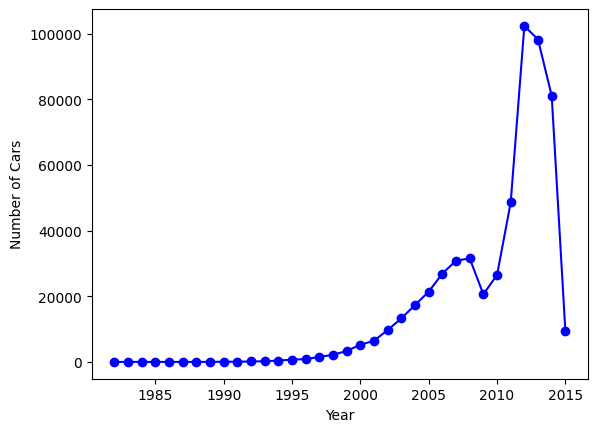

In [ ]:

year_count=data['year'].value_counts().sort_index()
plt.plot(year_count.index,year_count.values,marker='o',linestyle='-',color='b')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()



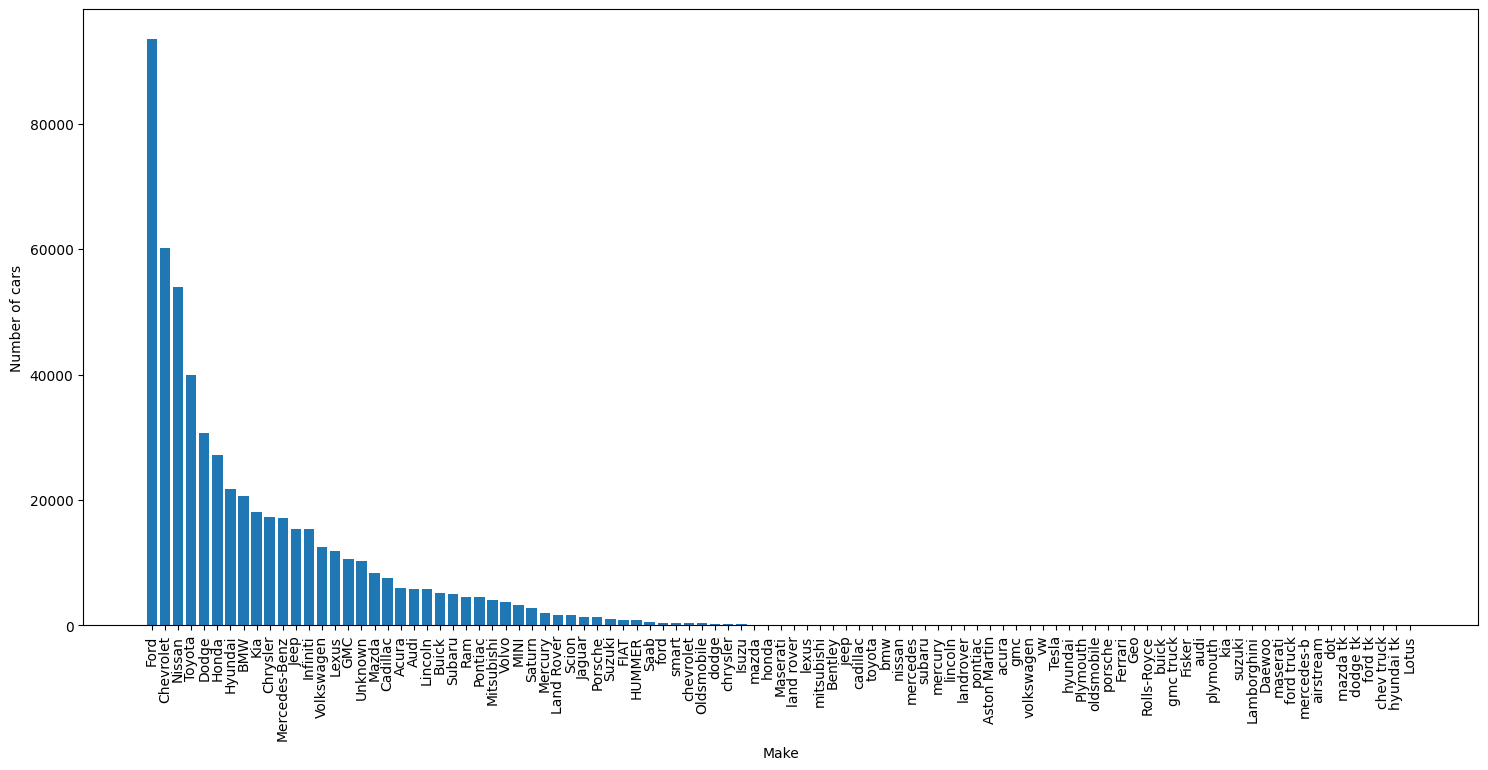

In [ ]:
#Distribution of make of car
make_count=data['make'].value_counts()
plt.figure(figsize=(18, 8))
plt.xlabel('Make')
plt.ylabel('Number of cars')
plt.bar(make_count.index,make_count.values)
plt.xticks(rotation=90)
plt.show()



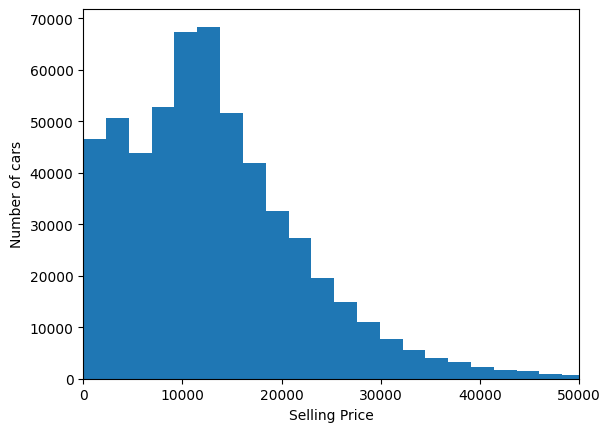

In [ ]:
#Histogram of selling price of cars
plt.hist(data['sellingprice'],bins=100)
plt.xlabel('Selling Price')
plt.ylabel('Number of cars')
plt.xlim(0,50000)
plt.show()


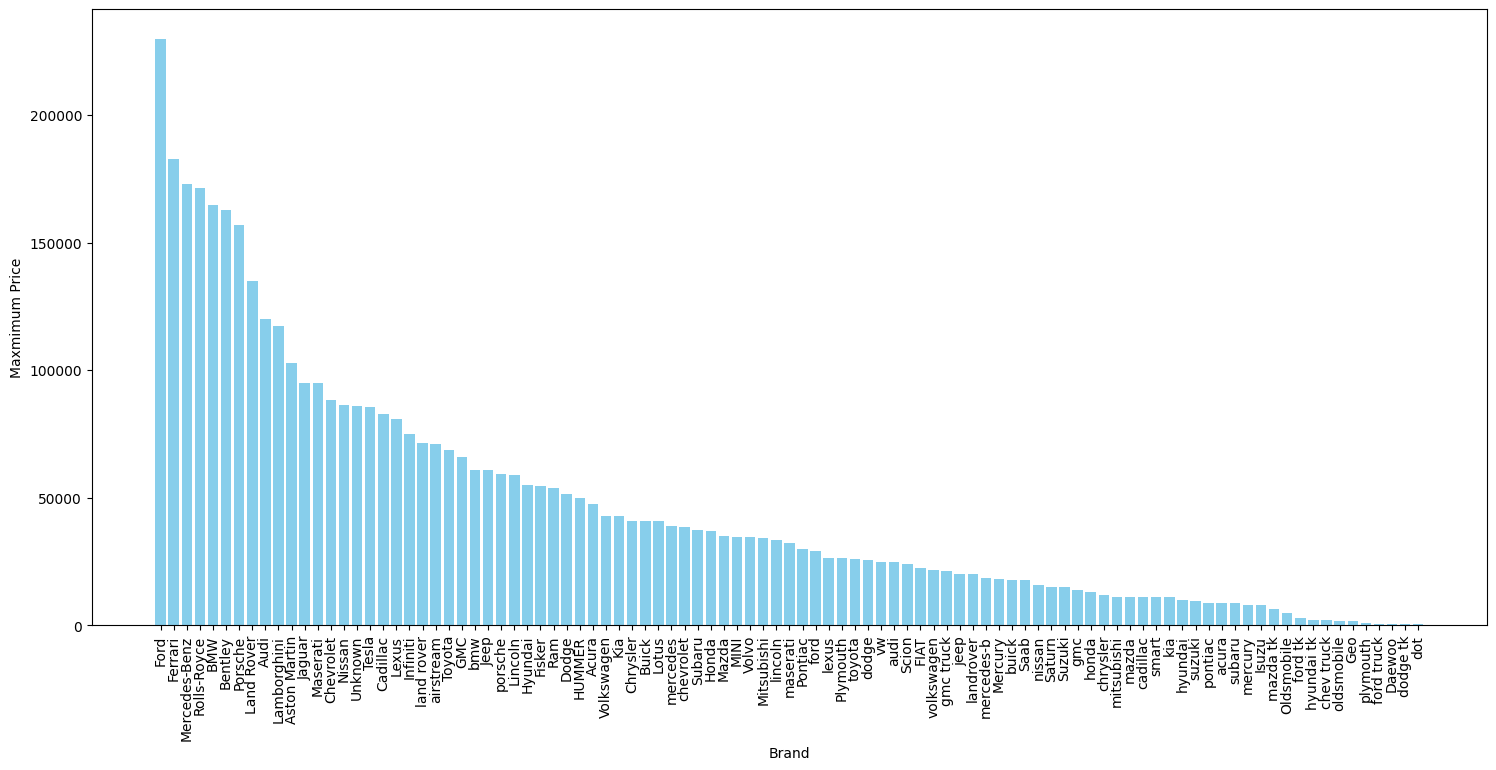

In [ ]:
#Maximum price of each brand cars
max_price=data.groupby('make')['sellingprice'].max().sort_values(ascending=False)
plt.figure(figsize=(18, 8))
plt.xlabel('Brand')
plt.ylabel('Maxmimum Price')
plt.bar(max_price.index,max_price.values,color='skyblue')
plt.xticks(rotation=90)
plt.show()



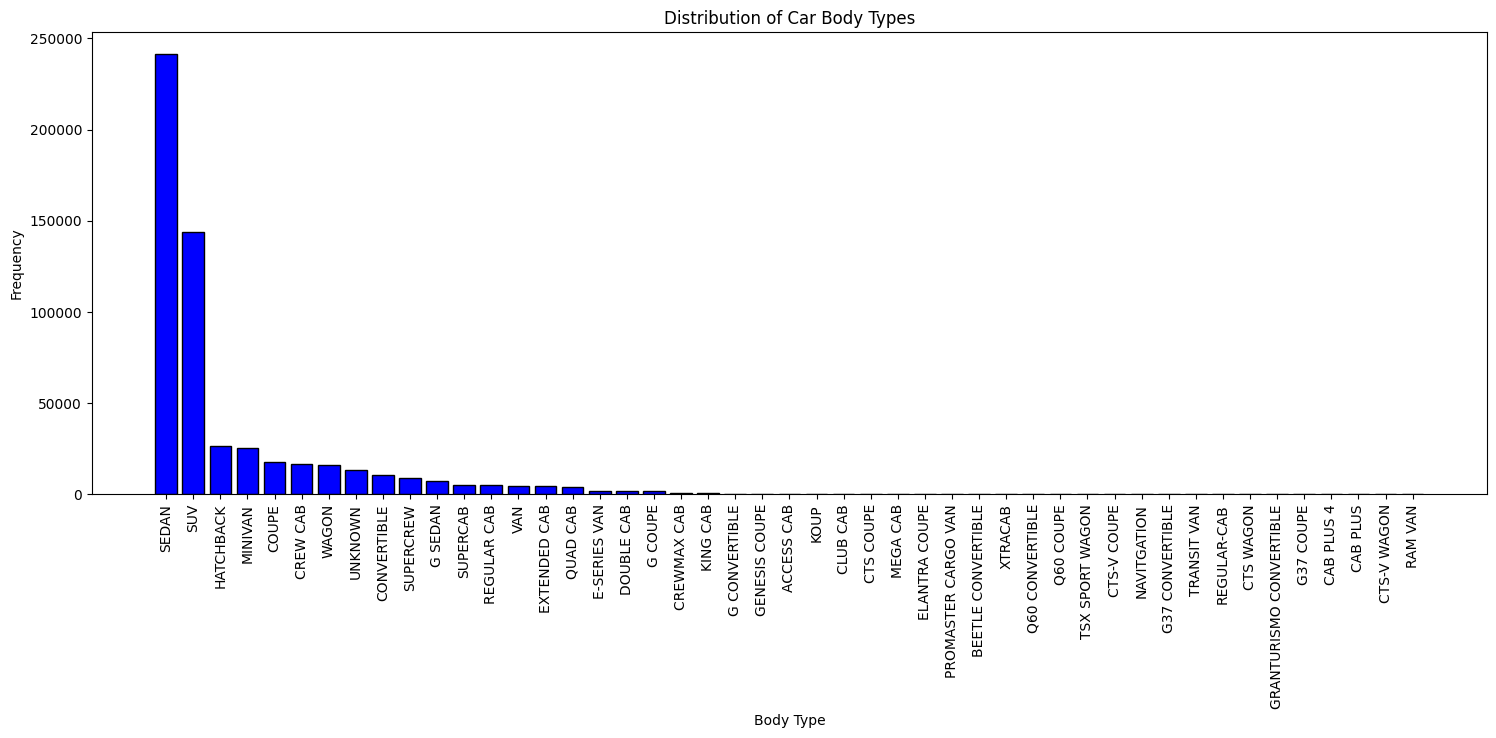

In [ ]:
#Distribution of car body types
body_counts=data['body'].value_counts()
plt.figure(figsize=(18, 6))
plt.bar(body_counts.index, body_counts.values, color='blue', edgecolor='black')
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.title('Distribution of Car Body Types')
plt.xticks(rotation=90)
plt.show()


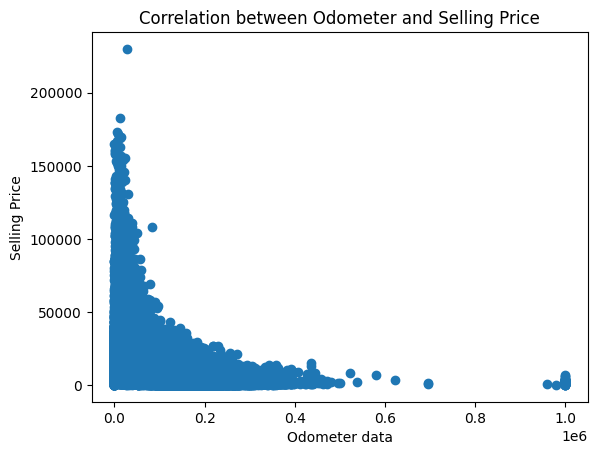

In [ ]:
#Correlation between Odometer and selling price
plt.scatter(data['odometer'],data['sellingprice'])
plt.xlabel("Odometer data")
plt.ylabel("Selling Price")
plt.title("Correlation between Odometer and Selling Price")
plt.show()


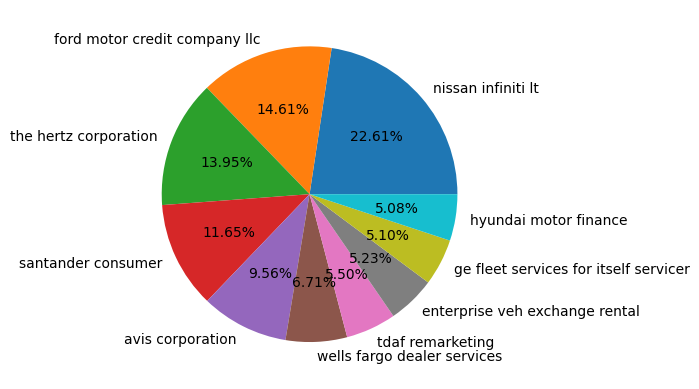

In [ ]:
seller_count=data['seller'].value_counts().head(10)
plt.pie(seller_count.values,labels=seller_count.index,autopct='%0.2f%%')
plt.show()

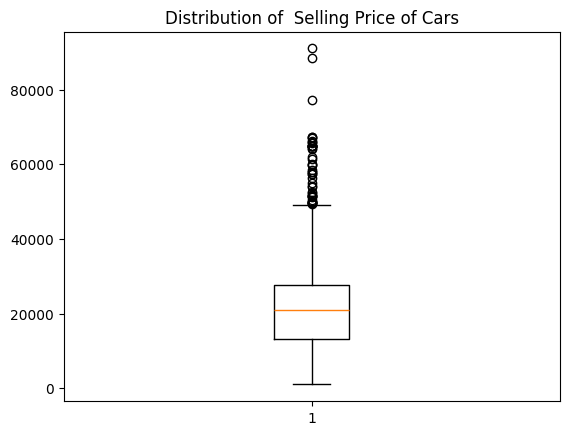

In [ ]:
#Box plot describing selling price
plt.boxplot(data['sellingprice'].head(1000))
plt.title("Distribution of  Selling Price of Cars")
plt.show()




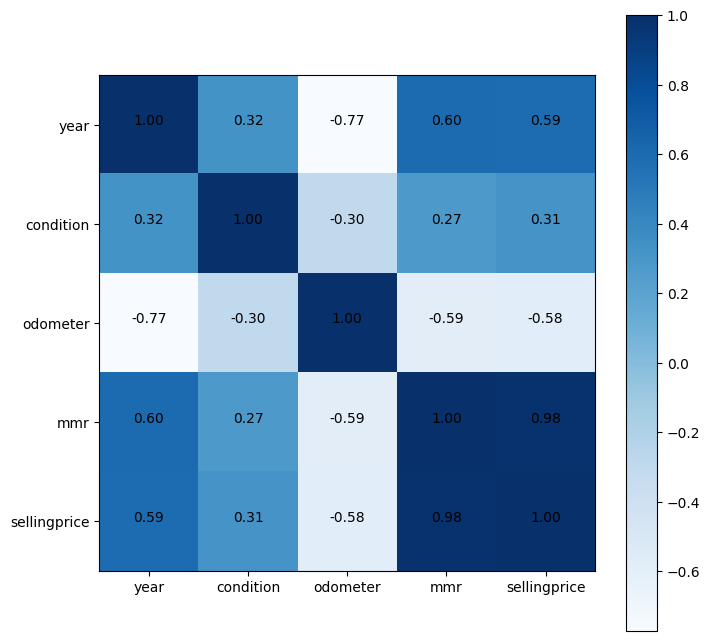

In [ ]:
numerical_columns=['year', 'condition', 'odometer', 'mmr', 'sellingprice']
data_corr=data[numerical_columns].corr()
data_corr
plt.figure(figsize=(8,8))

plt.xticks(range(5),data_corr.index)
plt.yticks(range(5),data_corr.index)
for i in range(5):
  for j in range(5):
    plt.text(i,j,"{:.2f}".format(data_corr.values[i,j]),ha='center')

plt.imshow(data_corr,cmap='Blues')
plt.colorbar()